<span style="display:block; text-align:center">

# Prediction of Students Dropout and Academic Success

<span style="display:block; text-align:center">

**A Project by:**<br>
Cristal Rivera <br> 
Anton Donle


 **Course Name:**<br>
Topics on Machine Learning and its Applications

## 1. Problem Definition and Dataset Selection

### 1.1 Problem Definition

As students of the AISS program, we set out to analyze factors that may contribute to student dropoutin higher education and explore how these can be predicted using machine learning. This issue has been widely researched in many countries, with efforts focused on measuring dropout rates and developing strategies to prevent early school leaving.

In Portugal, the school dropout rate had been steadily declining for the past 18 years. However, in 2023, it rose from 6.5% to 8%. In a related interview, it was noted that boys tend to drop out of school more often than girls. According to the researcher, this may be due to boys generally receiving lower grades than girls in teachers’ internal assessments. This gender gap has widened in recent years and is observed not only in Portugal but also across several other countries (Nova School of Business and Economics, 2023).

The European Commission (2023) reported that, under the national goal set by the Europe 2020 Strategy, Portugal aimed to reduce the early school leaving rate to 10%. To achieve this, various cross-sectoral and inter-institutional initiatives have been implemented to prevent and address early school leaving.

Despite the efforts made during this period, dropout remained a significant issue in Portuguese higher education due to its long-term social and economic consequences. According to Portdata (2023), Portugal currently ranks 13th out of the 27 EU countries with the lowest student dropout percentage.

The goal of this project is not only to evaluate machine learning models for predictive accuracy and performance  and compare our results with the exisiting efforts of analyzing the same problem. 

**OBJECTIVES**
1. Contribute to educational policy by providing a data-driven approach to monitor student success
2. Evaluate classification models to predict student dropout, continuation, or graduation
3. Design a logical prototype of a software tool that could assist educational institutions in identifying at-risk students early.(REMOVE FOR ML)

### 1.2 Dataset Selection

For this project, we selected a dataset from the UC Irvine Machine Learning Repository titled “Predict Students' Dropout and Academic Success,” donated on December 12, 2021. This dataset is supported by the SATDAP – Capacitação da Administração Pública program under grant POCI-05-5762-FSE-000191, Portugal. It was developed as part of a project to reduce academic dropout and failure in higher education.

The data includes records of students enrolled between the academic years 2008/2009 (following the implementation of the Bologna Process in European higher education) and 2018/2019. It tracks students starting from Fall 2008 through Fall 2018, focusing on their year of initial enrollment and subsequent academic progress.

Link to data set: 
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


### 1.3 Import Data Set

We proceed to import the dataset and the required dependency libraries needed throughout the project analysis

In [2]:
## Import Required Dependencies
import numpy as np
import pandas as pd
from sklearn.svm import SVC

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve, auc, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
#Load Dataset, seperate on ;
data = pd.read_csv('data.csv', sep = ';')
pd.set_option('display.max_columns', None)
#look at data
data[0:100]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,1,9119,1,1,130.0,26,38,3,9,2,137.0,1,0,0,1,1,0,19,1,0,5,9,5,14.000000,0,0,5,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled
96,1,1,5,9773,1,1,135.0,1,37,1,5,5,124.9,1,0,0,1,0,0,18,0,0,6,6,6,13.666667,0,0,6,6,6,13.333333,0,8.9,1.4,3.51,Graduate
97,1,1,5,9500,1,1,132.0,1,37,37,7,7,120.3,1,0,0,1,0,1,18,0,0,7,7,7,13.750000,0,0,8,9,8,14.477778,0,12.4,0.5,1.79,Graduate
98,1,1,1,9085,1,1,135.0,1,1,2,9,1,134.3,1,0,0,1,0,0,19,0,0,5,7,5,14.200000,2,0,5,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled


In [4]:
# Get the number of rows and columns
num_rows, num_cols = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 4424
Number of columns: 37


This initial overview of the dataset shows that it is not high-dimensional, as it contains 4,424 examples and 37 columns. A more detailed analysis will be presented in Section 2: Exploratory Data Analysis (EDA), where we will further examine the dataset to better understand its structure and prepare it for the application of machine learning techniques.

## 2. Exploratory Data Analysis

In this section, we explore the structure, distribution, and key characteristics of the dataset to gain insights and identify potential challenges before applying machine learning models.



### 2.1. General data analysis

In [5]:
#Information of columns: Nulls and datatypes
summary = pd.DataFrame({
    'Column': data.columns,
    'Null Count': data.isnull().sum().values,
    'Dtype': data.dtypes.values
})
summary
#summary[summary['Dtype'] == 'int64'].count()

,Column,Null Count,Dtype
0,Marital status,0,int64
1,Application mode,0,int64
2,Application order,0,int64
3,Course,0,int64
4,Daytime/evening attendance\t,0,int64
5,Previous qualification,0,int64
6,Previous qualification (grade),0,float64
7,Nacionality,0,int64
8,Mother's qualification,0,int64
9,Father's qualification,0,int64


In [6]:
#checking for duplicates
duplicates = data.duplicated().sum()
print('There are',duplicates,'duplicates in the dataset')

There are 0 duplicates in the dataset


Out of the 37 columns, 7 are read as integers, 29 as floats, and 1 as an object. There are no null values or duplicates.

In [7]:
#Opening txt files from the variables to show the categorical variables that are encoded.
file_path = 'variables.txt'
try:
    with open(file_path, 'r') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    

# %%
"""
Table of Variables:

Variable Name                  | Data Type | Measurement | Description                                                                 | Categories (if applicable)
---------------------------------|-----------|-------------|---------------------------------------------------------------------------|----------------------------
Marital status                 | Integer   | Nominal     | Student's marital status                                                    | 1-Single, 2-Married, 3-Widower, 4-Divorced, 5-Co-habitant, 6-Separated
Application mode               | Integer   | Ordinal     | Type of application                                                         | 17 distinct values mentioned
Application order              | Integer   | Ordinal     | Application order within the group                                          | -
Course                         | Integer   | Nominal     | Student's degree course                                              

Although the data type table initially shows that many variables are integers or floats, a closer review of the dataset's description on the UC Irvine Machine Learning Repository revealed the true nature of the variables. To clarify this, we created a data dictionary based on the provided information, which helped us better understand the actual types of variables in the dataset.

For example, in the variables text file (our custom data dictionary), we identified several categorical variables, each with a different number of distinct values. For instance, Application Mode has 17 distinct categories, while Father’s Occupation has 46.

Additionally, there are binary variables such as Debtor, Tuition Fees Up to Date, and Scholarship Holder.

Given these distinctions, we found it important to explore the numerical, categorical, and binary variables separately to ensure more accurate data analysis and interpretation.

#### 2.1.1 Numerical Variables

For the 18 varibales that are numerical we will obtain the descriptive statistics from them.

In [8]:
numerical_variables = data[[
    'Admission grade',
    'Previous qualification (grade)',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'GDP',  
    'Inflation rate'
]]
len(numerical_variables.columns)


18

In [9]:
# Display descriptive statistics for all numerical variables in the dataset
numerical_variables.describe().round(0)

,Admission grade,Previous qualification (grade),Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,GDP,Inflation rate
count,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0
mean,127.0,133.0,23.0,1.0,6.0,8.0,5.0,11.0,0.0,1.0,6.0,8.0,4.0,10.0,0.0,12.0,0.0,1.0
std,14.0,13.0,8.0,2.0,2.0,4.0,3.0,5.0,1.0,2.0,2.0,4.0,3.0,5.0,1.0,3.0,2.0,1.0
min,95.0,95.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,-4.0,-1.0
25%,118.0,125.0,19.0,0.0,5.0,6.0,3.0,11.0,0.0,0.0,5.0,6.0,2.0,11.0,0.0,9.0,-2.0,0.0
50%,126.0,133.0,20.0,0.0,6.0,8.0,5.0,12.0,0.0,0.0,6.0,8.0,5.0,12.0,0.0,11.0,0.0,1.0
75%,135.0,140.0,25.0,0.0,7.0,10.0,6.0,13.0,0.0,0.0,7.0,10.0,6.0,13.0,0.0,14.0,2.0,3.0
max,190.0,190.0,70.0,20.0,26.0,45.0,26.0,19.0,12.0,19.0,23.0,33.0,20.0,19.0,12.0,16.0,4.0,4.0


From the statistics table it can been that admission grade in average is 127 having the the maximum grade of 200 and same for the previous qualification grade. For the curricular units variables we check the general trends knowing that: 

Age at enrollment 70?
which is the max score for the admission grade?

In [10]:
data[data['Age at enrollment']== 70]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
689,4,39,2,9147,1,19,133.1,1,37,37,9,7,116.4,0,0,1,0,1,0,70,0,0,5,5,0,0.0,0,0,5,9,0,0.0,0,10.8,1.4,1.74,Dropout


#### 2.1.1 Categorical Variables

In [11]:
categorical_data = data[[
    'Application mode',
    'Daytime/evening attendance\t',
    'Previous qualification',
    'Mother\'s qualification',
    'Mother\'s occupation',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International',
    'Course',
    'Marital status',
    'Father\'s qualification',
    'Father\'s occupation',
    'Application order'

]]


In [12]:
##categorical variables with more than 25 levels 

categorical_data_max_levels = data[[
    'Mother\'s qualification',
    'Mother\'s occupation',
    'Father\'s qualification',
    'Father\'s occupation'

]]

##categorical variables with less than 25 levels 

categorical_data_min_levels = data[[
    'Application mode',
    'Previous qualification',
    'Course',
    'Marital status',
    'Application order'

]]

##categorical variables that are binary

categorical_data = data[[

    'Daytime/evening attendance\t',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International',

]]


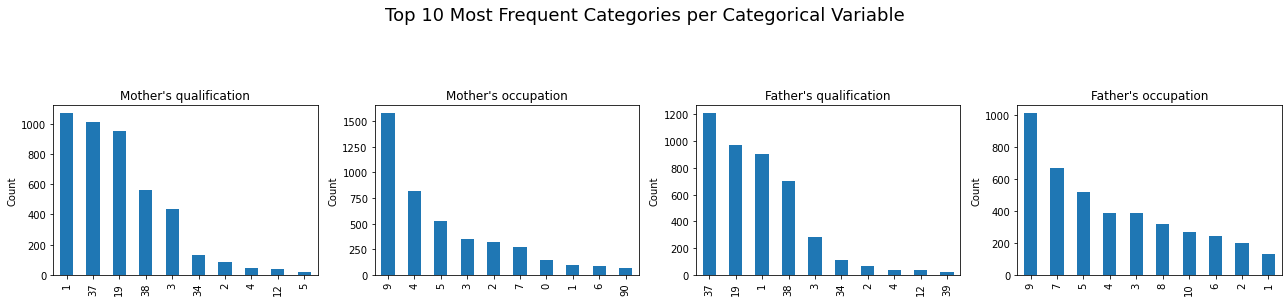

In [13]:

fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_data_max_levels.columns):
    counts = categorical_data_max_levels[col].value_counts().head(10)
    counts.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Count')

for i in range(len(categorical_data_max_levels.columns), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Top 10 Most Frequent Categories per Categorical Variable', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



In [14]:

for col in categorical_data_max_levels.columns:
    print(f"Top 10 counts for {col}:")
    print(categorical_data_max_levels[col].value_counts().head(10))
    print()



Top 10 counts for Mother's qualification:
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
Name: Mother's qualification, dtype: int64

Top 10 counts for Mother's occupation:
9     1577
4      817
5      530
3      351
2      318
7      272
0      144
1      102
6       91
90      70
Name: Mother's occupation, dtype: int64

Top 10 counts for Father's qualification:
37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
Name: Father's qualification, dtype: int64

Top 10 counts for Father's occupation:
9     1010
7      666
5      516
4      386
3      384
8      318
10     266
6      242
2      197
1      134
Name: Father's occupation, dtype: int64



### 2.2. Correlation Analysis


We will take a look at how correlated the different features are to each other. 
Plotting this in an understandable way is important, because there are a lot of features and it is hard to keep the overview.

In [15]:
#create new data frame without Target variable
data_without_target = data.drop(['Target'], axis = 1) 

c:\Users\crist\anaconda3\lib\site-packages\seaborn\matrix.py:332: UserWarning: Glyph 9 (	) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
c:\Users\crist\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


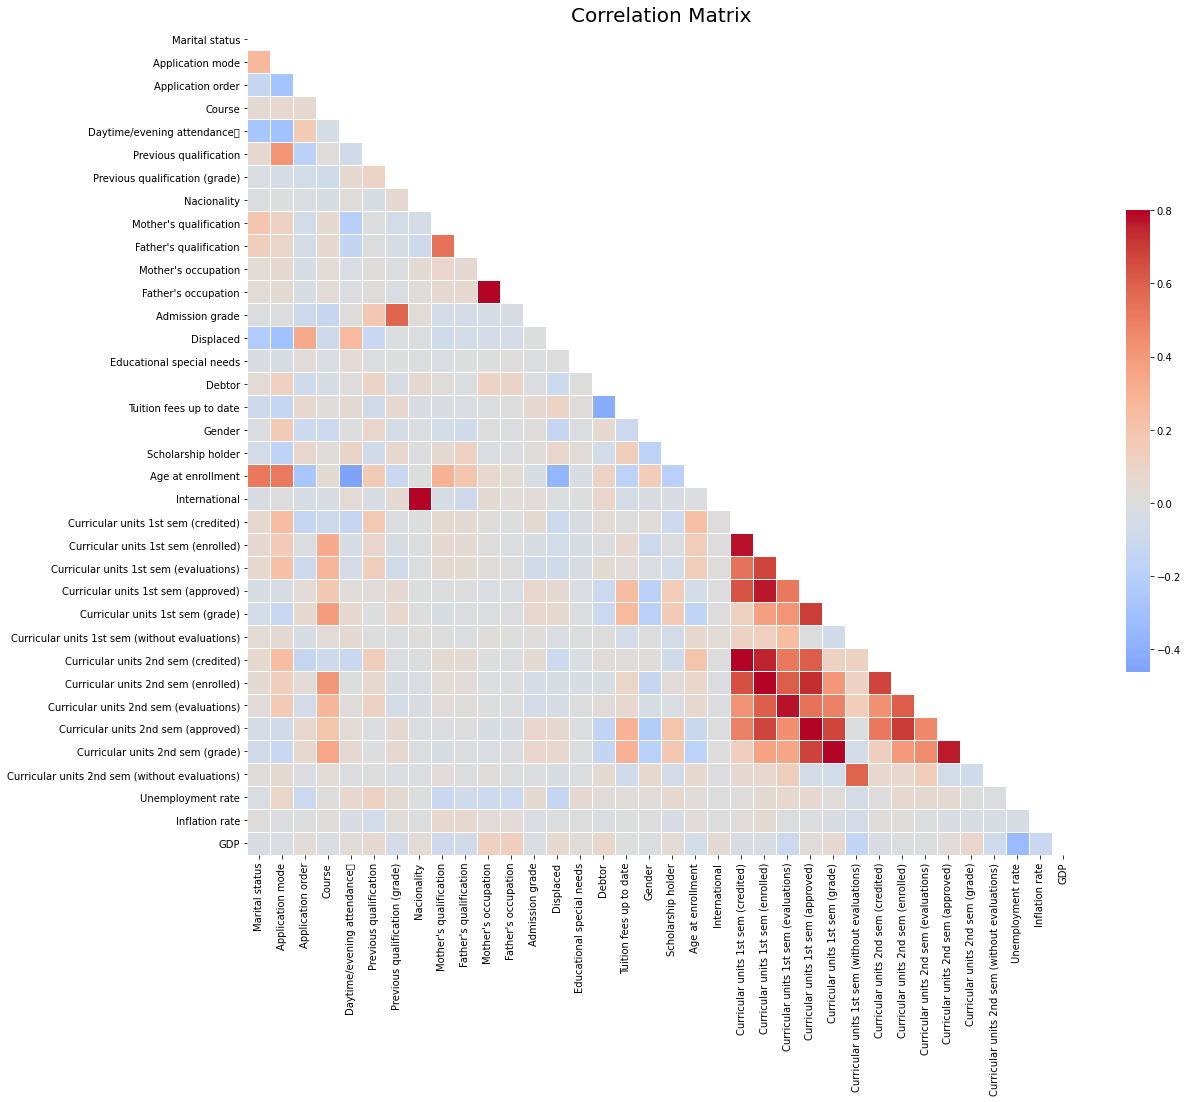

In [16]:

#Make a correlation matrix
corr = data_without_target.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 16)) # Adjust size as needed for 36 columns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


RED INDICATED HIGH CORRELATION

We observe a big cluster of high correlations in the credits features. This is especially high for the same category between semester one and two (graded, evaluated, accredited, and approved). <br>
We should maybe combine them into one or two categories (credits 1. sem, credits 2. sem)<br>
There is a very large correlation between nationality and International which makes sense and we should probably remove one of them.<br>
There is a large correlation between age and marital status and also between age and application mode<br>
We observe a high correlation between Fathers and Mothers occupation and Fathers and M|others qualification

### 2.3 Further variable analysis 

#### 2.3.1. Economic variables

While most features in the dataset were academic or administrative, we noticed the inclusion of macroeconomic indicators such as:GDP, Inflation rate and Unemployment rate.

These variables aren’t typically used in student-level analysis, but they intrigued us because they reflect broader societal conditions that could influence dropout decisions — especially financial stress, job market pressure, or national investment in education.

We will call them Economic Variables.

* **Unemployment Rate:**
Reflects the percentage of the labor force that is unemployed at the time of the student's enrollment. A higher unemployment rate might influence a student's decision to pursue higher education or affect their financial stability. 
* **Inflation Rate:** 
Indicates the rate at which the general level of prices for goods and services is rising. High inflation can impact the cost of living and educational expenses. 
* **GDP (Gross Domestic Product):**
 Represents the economic performance of the country. A higher GDP may correlate with better funding for educational institutions and more opportunities for students.

For the economic variables, we created tables of their descriptive statistics to review their behavior by the target variable and compared them with boxen plots to visualize the distribution and dispersion of the values.

In [ ]:
# Describe economic variables grouped by target value
economic_var = data[['Unemployment rate', 'Inflation rate', 'GDP', 'Target']]
grouped_stats = economic_var.groupby('Target').describe().round(2)
grouped_stats_T = grouped_stats.T# Display the transposed grouped statistics
grouped_stats_T

Target                         0        1
Unemployment rate count  2209.00  1421.00
                  mean     11.64    11.62
                  std       2.60     2.77
                  min       7.60     7.60
                  25%       9.40     9.40
                  50%      11.10    11.10
                  75%      13.90    13.90
                  max      16.20    16.20
Inflation rate    count  2209.00  1421.00
                  mean      1.20     1.28
                  std       1.37     1.40
                  min      -0.80    -0.80
                  25%       0.30     0.30
                  50%       0.60     1.40
                  75%       2.60     2.60
                  max       3.70     3.70
GDP               count  2209.00  1421.00
                  mean      0.08    -0.15
                  std       2.26     2.25
                  min      -4.06    -4.06
                  25%      -1.70    -1.70
                  50%       0.79     0.32
                  75%       1.79     1.74
                  max       3.51     3.51

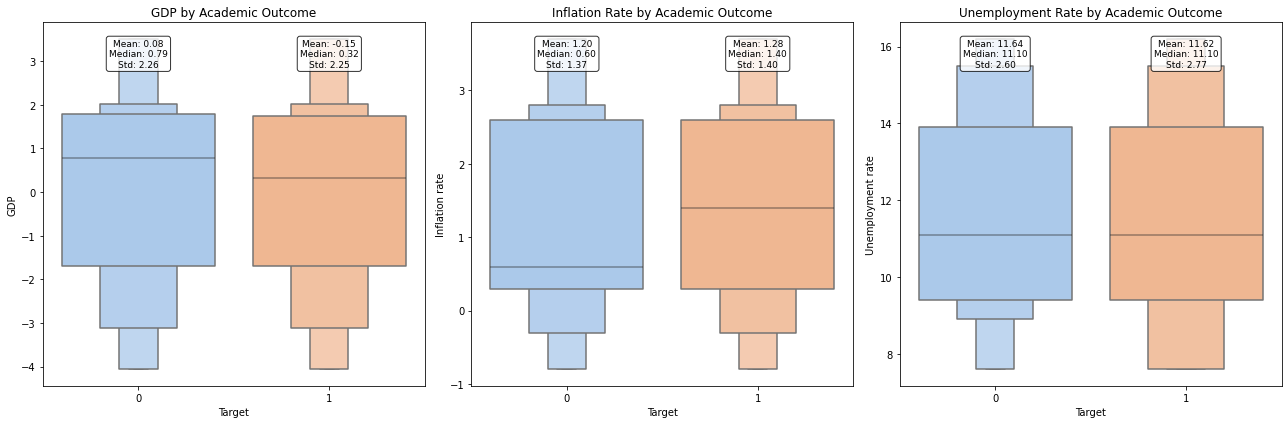

In [78]:
# Boxenplot for economic variables with principal stats labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

cols = ['GDP', 'Inflation rate', 'Unemployment rate']
titles = ['GDP by Academic Outcome', 'Inflation Rate by Academic Outcome', 'Unemployment Rate by Academic Outcome']

for ax, col, title in zip(axes, cols, titles):
    sns.boxenplot(x='Target', y=col, data=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Target')
    ax.set_ylabel(col)

    # Add principal stats labels for each target class
    for i, target in enumerate(sorted(data['Target'].unique())):
        vals = data[data['Target'] == target][col]
        mean = vals.mean()
        median = vals.median()
        std = vals.std()
        stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nStd: {std:.2f}"
        y_pos = vals.quantile(0.95)
        ax.text(i, y_pos, stats_text, ha='center', va='top', fontsize=9,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.tight_layout()
plt.show()

Based on the boxenplot created for the three variables by target variable:
1. For GDP: it looks like from the data collected that when GDP increases there are more student's that Graduate(0) comparig the mean and meadian, the std is similar for both. Is skewed to the left. 
2. For Inflation rate:  looks like when inflation rate is higher the students tend to Dropout(0)and viceversa. 
3. For Unemployment:  The unemployment rate does not appear to be a strong differentiating factor between these two academic outcomes. Having more distinct "stairs" for Target 0 - at the bottom means that people in this group experienced a slightly wider variety of very low unemployment rates 

In [18]:
# Count number of different combinations and how often they occur
comb_counts = economic_var.value_counts().reset_index(name='count')
comb_counts

,Unemployment rate,Inflation rate,GDP,count
0,7.6,2.6,0.32,571
1,9.4,-0.8,-3.12,533
2,10.8,1.4,1.74,525
3,12.4,0.5,1.79,445
4,12.7,3.7,-1.70,419
5,11.1,0.6,2.02,414
6,15.5,2.8,-4.06,397
7,13.9,-0.3,0.79,390
8,8.9,1.4,3.51,368
9,16.2,0.3,-0.92,362


We saw that there is 9 different unique combinations of values in the economic variable. 


#### 2.3.2. Nationality and International

Based on the high correlation between nationality and international, we want to have a closer look at the variables in order to decide which of the two we would like to drop in the feature engineering.

In [19]:
print(len(data.value_counts("Nacionality")))
# Group Nacionality into 'largest' and 'other'
largest_nacionality = data['Nacionality'].value_counts().idxmax()
grouped = data['Nacionality'].apply(lambda x: 'portuguese' if x == largest_nacionality else 'other')
data.value_counts(grouped)

21


Nacionality
portuguese    4314
other          110
dtype: int64

Nationality has 21 different classes, but any class except for portuguese only occurs 1-4 times. Grouping them into 'other' sums to 110 in total, while there are 4314 portugese students.

In [20]:
data.value_counts("International")

International
0    4314
1     110
dtype: int64

International indicates with a 0 if the student is international, and wit a 1 if they are international, which makes them almost equivalent to the nationality feature.
Our conclusion is to drop Nationality, because it has more classes that provide very little new information. 


#### 2.3.3. Qualifications and Occupations

Based on the high correlation between Father's and Mother's qualification we will take a closer look at them. We will do the same for Mothers and Fathers occupation.
We will arbitrarily sort them by mothers occupation and only show the top 10.

In [21]:
# Create a DataFrame with value counts for the two columns
mothers_qual = data["Mother's qualification"].value_counts()
fathers_qual = data["Father's qualification"].value_counts()
mothers_qual.index.name = 'ID'
# Show only the top 10 for each qualification

fathers_qual.index.name = 'ID'


qual_table = pd.DataFrame({
    "Mother's qualification": mothers_qual,
    "Father's qualification": fathers_qual,
}).fillna(0).astype(int)

qual_table.sort_values(by="Mother's qualification", ascending=False, inplace=True)
qual_table.head(10)

,Mother's qualification,Father's qualification
ID,,
1,1069,904
37,1009,1209
19,953,968
38,562,702
3,438,282
34,130,112
2,83,68
4,49,39
12,42,38


In [22]:
mothers_qual = data["Mother's occupation"].value_counts()
fathers_qual = data["Father's occupation"].value_counts()
mothers_qual.index.name = 'ID'
fathers_qual.index.name = 'ID'


qual_table = pd.DataFrame({
    "Mother's occupation": mothers_qual,
    "Father's occupation": fathers_qual,
}).fillna(0).astype(int)

qual_table.sort_values(by="Mother's occupation", ascending=False, inplace=True)
qual_table.head(10)

,Mother's occupation,Father's occupation
ID,,
9,1577,1010
4,817,386
5,530,516
3,351,384
2,318,197
7,272,666
0,144,128
1,102,134
6,91,242


We can not see any  trends and it is not obvious if one of the features provides more information, so it does not matter to us which of the two we should drop. We 'arbitrarily' choose to keep mothers qualification and occupation. 

#### 2.3.4. Curricular Units

We will further analyse the correlations between the curricular unit variables. Mnetion the cluster shown in the correlation plot

In [23]:
#creation of correlation table with curricular columns
curricular_matrix = data_without_target.filter(like ="Curricular", axis=1)
correlation_table = curricular_matrix.corr()


# Remove self-correlation (set diagonal values to NaN)
np.fill_diagonal(correlation_table.values, np.nan)
high_corr_pairs = correlation_table.stack().reset_index() #transform to a DF
high_corr_pairs.columns = ['Col_1', 'Col_2', 'Correlation']

#treshold to filter the confusion matrix with the correlations that are hi gher to this value
threshold = 0.65

# Filter to keep both high positive and high negative correlations
filtered_corr = high_corr_pairs[
    (high_corr_pairs['Correlation'] > threshold) | (high_corr_pairs['Correlation'] < -threshold)
].sort_values(by="Correlation", ascending=False)

# Display the results
filtered_corr[::2]

,Col_1,Col_2,Correlation
66,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),0.944811
78,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),0.942627
41,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904002
53,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837170
90,Curricular units 2nd sem (evaluations),Curricular units 1st sem (evaluations),0.778863
0,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774344
34,Curricular units 1st sem (approved),Curricular units 1st sem (enrolled),0.769083
119,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),0.760804
67,Curricular units 2nd sem (credited),Curricular units 1st sem (enrolled),0.753747
39,Curricular units 1st sem (approved),Curricular units 2nd sem (enrolled),0.733772


Based on this table we can see the variables that are correlated and that we can decide to either remove one of those or merge them like the curricular columns.
We would calculate the average per year, rather than the curricular units per semester.



### 2.4. Target Variable

We will make some changes to the target variable, that usually should happen in feature engineering, but we will run models before feature engineering, so we want the target variable to be consistent.

#### 2.4.1 Target Variable Exploration

We chose to focus on predicting student dropout because it represents a negative outcome that institutions actively seek to prevent. Early identification of at-risk students allows for timely intervention and support, making this prediction task highly valuable for policy and practice.

The dataset includes relevant academic and demographic features that can inform dropout risk. The labeled 'dropout' class makes it feasible to train reliable machine learning classification models.

The target variable in this data set is named: 'Target' and have three labels: Graduate, Dropout and Enroll. 


In [24]:
#Check for class balance
n_graduate, n_dropout, n_enrolled = data.value_counts('Target')

In [25]:
n = n_graduate + n_dropout + n_enrolled
proportion_g = n_graduate/n
proportion_d = n_dropout/n
proportion_e = n_enrolled/n
print(proportion_g, proportion_d, proportion_e)

0.4993218806509946 0.3212025316455696 0.1794755877034358


We observe the following pattern of our target label: <br>
Graduate: 2209 (0.49) <br>
Dropout: 1421 (0.32)<br>
Enrolled: 794 (0.17)<br>
First number is occurence, second is frequency
There is a class imbalance.

<Axes: xlabel='Target', ylabel='count'>

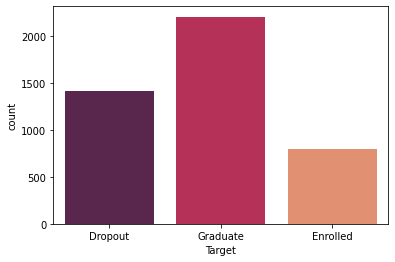

In [26]:
sns.set_palette("pastel")
#sns.histplot(data = data, x = "Target" )
sns.countplot(x='Target', data=data, palette='rocket')

explain why we move the enroll to remove here, because even thogh we try the before feature engineering it make more senes to compare the moedls with the same level of classes in the target variable.

We will remove the enrolled students, because we can not know if they will graduate or not. 
We decided to make this our scope trying to identify whether a student will successfully finish their studies or drop out before finishing. 

Furthermore, prediciting that a student will be enrolled, might not provide as much valuable information to the institutions.
This makes our task into a binary classification task.

In [27]:
#We will drop people with target value == Enrolled
enrolled = data[data["Target"] == "Enrolled"].index
data.drop(enrolled,inplace=True)
data["Target"].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

#### 2.4.2 Target Variable Encoding

During the process we ran into issues because the target was not encoded.
Grid search required encoded target variables.
Also the evaluation metrics methods we used needed it.

In [28]:
#Translate Target to 0 or 1 for SVM 
data = data.replace("Dropout", 1)
data = data.replace("Graduate", 0)

### 2.5. Takeaways from EDA

Here we will propose a set of changes that we will explore and make in the feature engineering.

1. Resolve Economic Situation (GPD, Inflation Rate, Unenmployment Rate)
2. Resolve International + Nationality
3. Maritial Status + Age of enrollment, Age of enrollment + application mode
4. Resolve Curricular units
5. Resolve Mothers + Fathers occupation
6. Replace numbers that encode something by string for what they encode
7. undo encoding - (further discussed later on)

## 3. Models Before Feature Engineering

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split    
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import GaussianNB

from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 


## add more justification of the chosen models

We decided to perform machine learning on our dataset before we do the feature engineering.
This is to have a baseline of how well the set of machine learning algorithms perform on the dataset without any preprocessing. Doing this enables us to test how much, if at all, the algorithms improve after feature engineering. We are testing a wide range of algorithms and for the ones that are most promising we will perform further hyper parameter testing later on.

The algorithms we picked are:<br>

Black Box model:<br>
Support Vector Machine classifier<br>

White Box models:<br>
1. K Nearest Neighbours <br>
2. Logistic Regression<br>
3. Decision Trees<br>
4. Naive Bayes Classifier<br>


Those were picked because they are interpretable to some extent and they are widely used. They are also rather simple models, compared to something more complex like convolutional neural networks.

KNN classifies each entity in correspondence to the majority of its neighbours (where the parameter k indicates how many neighbours it looks at)
Support Vector Machine fits a classification line through the feature space after projecting the feature space into higher dimensions until it can fit a linear classification line.
Decision trees define a set of questions/instructions/properties that are checked in a specific order to reach a conclusion about the class of the element.
Naive Bayes Classifier makes use of Naives Bayes assumption to calculate a probability of an entity belonging to class, given a set of features : P(Class| Features X)
Logistic Regression predicts the probability that an entity belongs to a certain class by fitting a curve (logistic function) to the data. It classifies it based on whether this probability passes a certain threshold.



In the pipeline, first the target variable will be extracted from the dataframe as y (target). The feature space X is the data frame without the target variable.
The data will be split into test and train data using the scipy function split_test_train, with a split of 80% and 20% and the random seed will be defined as = 43.
In this section functions will be defined that run a model and return the predictions. This means we can simply reuse those functions later on.

Each model will be run and their predictions will be stored

In [30]:
data_before_engineering = data

#Define X and y 
y = data_before_engineering["Target"]
X = data_before_engineering.drop(['Target'], axis = 1) 

#This gave errors sometimes so we are converting to int
y = y.astype('int')

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)

### 3.1. SVM

In [31]:
def train_and_predict_SVM(X_train, y_train, x_test):
    #Initilize a SVM
    clf = SVC(random_state=43,probability=True)
    #Fit it to the training data
    clf.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return(y_pred)

y_pred_svm = train_and_predict_SVM(X_train, y_train, X_test)

### 3.2. KNN

In [32]:
def train_and_predict_KNN(X_train, y_train, x_test, n):
    #Initilize a KNN
    knn = KNeighborsClassifier(n_neighbors=n)
    #Fit it to the training data
    knn.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = knn.predict(x_test)
    #Check Accuracy
    return(y_pred)

n = 3
y_pred_knn= train_and_predict_KNN(X_train, y_train, X_test, n)

### 3.3. Logistic Regression

In [33]:
def train_and_predict_LR(X_train, y_train, x_test):
    #Initilize a LR
    clf = LogisticRegression(random_state=43,max_iter = 50)
    #Fit it to the training data
    clf.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return y_pred


y_pred_lr = train_and_predict_LR(X_train, y_train, X_test)

c:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.4. Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier


def train_and_predict_DTC(X_train, y_train, x_test):

    #Initilize a DTC
    clf = DecisionTreeClassifier(random_state=43)
    #Fit it to the training data
    clf.fit(X_train,y_train)
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return y_pred

y_pred_dt = train_and_predict_DTC(X_train, y_train, X_test)

### 3.5. Naive Bayes

In [35]:
def train_and_predict_GNB(X_train, y_train, X_test):
    #Initilize a SVM
    gnb = GaussianNB()
    #Fit it to the training data
    gnb.fit(X_train,y_train)
    #Predicate on the testdata
    y_pred = gnb.predict(X_test)
    #Check Accuracy
    accuracy = accuracy_score(y_pred, y_test)
    return y_pred

y_pred_gnb = train_and_predict_GNB(X_train, y_train, X_test)

## 4. Feature Engineering

NOTE: Give overview of section here, add details later in the subsections

In the exploratory data analysis we identified changes we want to make to the dataset with the goal to make it more interpretable and make a machine learning model perform better.

The steps are 1. drop columns with high correlations.

Step 2: Derive new features based on old features. 

Step 3: Cardinality reduction of columns with many classes.

Step 4: One hot encoding of two features.


### 4.1. Dropping Columns

We will resolve the previous mentioned high correlations <br>
Since Admission grade and previous qualification(grade) have high correlation -> Remove previous qualification(grade) <br>
Age at enrollment + Appplication mode -> Remove Application Mode <br>
Age at enrollment + Maritial Status -> Remove Maritial Status <br>
International + Nationality -> Remove Nationality<br>
Mothers Occupation and Fathers Occupation -> Remove Fathers Occupation<br>
Mothers Education and Fathers Edducation -> Remove Fathers Education<br>



In [36]:
#Here we will remove the previously mentioned columns
data.drop(columns = ["Previous qualification (grade)", "Marital status", "Nacionality", "Father's qualification", "Father's occupation"], inplace = True)

### 4.2. Creation of new columns

We are derriving new feature by taking the average of any given curricular unit column from semester 1 and 2 and calculating the average ((semester 1 + semester 2) / 2. The semester 1 and semester 2 columns are then removed and the average is added to the dataframe as a new feature. This is done for curricular units: credited, enrolled, evaluations, approved, grade, without evaluations.

In [37]:
#Here we will join the curricular units
#Get the average of the credits columns of 1st sem and 2nd sem

# categories of name:

data['Curricular units year (credited)'] = (data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)'])/2
data['Curricular units year (enrolled)'] = (data['Curricular units 1st sem (enrolled)'] + data['Curricular units 2nd sem (enrolled)'])/2
data['Curricular units year (evaluations)'] = (data['Curricular units 1st sem (evaluations)'] + data['Curricular units 2nd sem (evaluations)'])/2
data['Curricular units year (approved)'] = (data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)'])/2
data['Curricular units year (grade)'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)'])/2
data['Curricular units year (without evaluations)'] = (data['Curricular units 1st sem (without evaluations)'] + data['Curricular units 2nd sem (without evaluations)'])/2

data.drop(columns = ['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 2nd sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (evaluations)',
                 'Curricular units 1st sem (approved)','Curricular units 2nd sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], inplace = True)

### 4.3. Cardinality Reduction

We will perform cardinality reduction for course, mothers qualification and previous qualification. The courses are grouped into areas of study. This reduces the number of classes from 17 to 8. The name of the column is changed to ‘field of study’, because it no longer represents the course. Mothers Qualification and previous qualification have 29 and 17 classes. We decided to group both of them into secondary education, lower than secondary education and higher than secondary education. Both features now only have 3 classes.

#### 4.3.1 Mothers Qualification

In [38]:
# data["Mother's qualification"] = data["Mother's qualification"].replace({
#     1: 'Secondary Education - 12th Year of Schooling or Eq.',
#     2: "Higher Education - Bachelor's Degree",
#     3: 'Higher Education - Degree',
#     4: "Higher Education - Master's",
#     5: 'Higher Education - Doctorate',
#     6: 'Frequency of Higher Education',
#     9: '12th Year of Schooling - Not Completed',
#     10: '11th Year of Schooling - Not Completed',
#     11: '7th Year (Old)',
#     12: 'Other - 11th Year of Schooling',
#     14: '10th Year of Schooling',
#     18: 'General commerce course',
#     19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
#     22: 'Technical-professional course',
#     26: '7th year of schooling',
#     27: '2nd cycle of the general high school course',
#     29: '9th Year of Schooling - Not Completed',
#     30: '8th year of schooling',
#     34: 'Unknown',
#     35: "Can't read or write",
#     36: 'Can read without having a 4th year of schooling',
#     37: 'Basic education 1st cycle (4th/5th year) or equiv.',
#     38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
#     39: 'Technological specialization course',
#     40: 'Higher education - degree (1st cycle)',
#     41: 'Specialized higher studies course',
#     42: 'Professional higher technical course',
#     43: 'Higher Education - Master (2nd cycle)',
#     44: 'Higher Education - Doctorate (3rd cycle)'


data["Mother's qualification"] = data["Mother's qualification"].replace({
    1: 'M. secondary education',
    2:'M. higher than secondary education',
    3:'M. higher than secondary education',
    4:'M. higher than secondary education',
    5:'M. higher than secondary education',
    6:'M. lower than secondary education',
    9: 'M. lower than secondary education',
    10: 'M. lower than secondary education',
    11: 'M. lower than secondary education',
    12: 'M. lower than secondary education',
    14: 'M. lower than secondary education',
    18: 'M. higher than secondary education',
    19: 'M. lower than secondary education',
    22: 'M. higher than secondary education',
    26: 'M. lower than secondary education',
    27: 'M. lower than secondary education',
    29: 'M. lower than secondary education',
    30: 'M. lower than secondary education',
    34: 'M. lower than secondary education',
    35: 'M. lower than secondary education',
    36: 'M. lower than secondary education',
    37: 'M. lower than secondary education',
    38: 'M. lower than secondary education',
    39: 'M. higher than secondary education',
    40: 'M. higher than secondary education',
    41: 'M. higher than secondary education',
    42: 'M. higher than secondary education',
    43: 'M. higher than secondary education',
    44: 'M. higher than secondary education'
})

data["Mother's qualification"].value_counts()

M. lower than secondary education     2288
M. secondary education                 865
M. higher than secondary education     477
Name: Mother's qualification, dtype: int64

#### 4.3.2 Previous Qualification

In [39]:

# 1 - Secondary education
# 2 - Higher education - bachelor's degree
# 3 - Higher education - degree
# 4 - Higher education - master's
# 5 - Higher education - doctorate
# 6 - Frequency of higher education
# 9 - 12th year of schooling - not completed
# 10 - 11th year of schooling - not completed
# 12 - Other - 11th year of schooling
# 14 - 10th year of schooling
# 15 - 10th year of schooling - not completed
# 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
# 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
# 39 - Technological specialization course
# 40 - Higher education - degree (1st cycle)
# 42 - Professional higher technical course
# 43 - Higher education - master (2nd cycle)


data["Previous qualification"] = data["Previous qualification"].replace({
    1: 'S. secondary education',
    2: 'S. higher than secondary education',
    3: 'S. higher than secondary education',
    4: 'S. higher than secondary education',
    5: 'S. higher than secondary education',
    6: 'S. lower than secondary education',
    9: 'S. lower than secondary education',
    10: 'S. lower than secondary education',
    12: 'S. lower than secondary education',
    14: 'S. lower than secondary education',
    15: 'S. lower than secondary education',
    19: 'S. lower than secondary education',
    38: 'S. lower than secondary education',
    39: 'S. higher than secondary education',
    40: 'S. higher than secondary education',
    42: 'S. higher than secondary education',
    43: 'S. higher than secondary education'
})


data["Previous qualification"].value_counts()


S. secondary education                3019
S. higher than secondary education     384
S. lower than secondary education      227
Name: Previous qualification, dtype: int64

#### 4.3.3 Course

In [40]:
#Group Them
data["Course"] = data["Course"].replace({
    33: 'Engineering and Technology', # Biofuel Production Technologies
    171: 'Design and Media', # Animation and Multimedia Desig
    8014: 'Social Sciences', # Social Service (evening attendance)
    9003: 'Agriculture and Environment',# Agronomy
    9070: 'Design and Media',# Communication Design 
    9085: 'Health Sciences',# Veterinary Nursing 
    9119: 'Engineering and Technology',# Informatics Engineering 
    9130: 'Agriculture and Environment',# Equinculture 
    9147: 'Business and Management',# Management
    9238: 'Social Sciences',#  Social Service
    9254: 'Tourism and Hospitality',# Tourism
    9500: 'Health Sciences',# Nursing
    9556: 'Health Sciences',# Oral Hygiene
    9670: 'Business and Management',# Advertising and Marketing Management
    9773: 'Design and Media',# Journalism and Communication
    9853: 'Education',# Basic Education
    9991: 'Business and Management' # Management (evening attendance)
})
data["Course"].value_counts()

#Encode them again
data["Course"] = data["Course"].replace({
    'Health Sciences': 0,
    'Business and Management': 1,
    'Design and Media': 2,
    'Social Sciences': 3,
    'Agriculture and Environment': 4,
    'Tourism and Hospitality': 5,
    'Education': 6,
    'Engineering and Technology': 7
})

data["Course"].value_counts()

##rename course to Area of Study
data.rename(columns = {'Course':'Area of Study'}, inplace = True)

### 4.4. One Hot Encoding

Here we will one hot encode Mothers qualification and previous qualification. This was done so that the classes would no longer be interpreted by the model as representing an ordinal relationship. We decided to encode them with 3 features for the sake of interpretability, even though adding only 2 would have been able to provide the same information (as when both are wrong that would mean the third one has to be true).

In [41]:
data_backup_before_one_hot_encoding= data
data = pd.get_dummies(data, columns=["Mother's qualification"]) # ,drop_first=True) # check if we need to do the drop or not to avoid multicollinearity
data = pd.get_dummies(data, columns=["Previous qualification"]) # ,drop_first=True) # check if we need to do the drop or not to avoid multicollinearity


In [42]:
#we will show the new modified dataset after feature engineering
data.head()

,Application mode,Application order,Area of Study,Daytime/evening attendance\t,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular units year (credited),Curricular units year (enrolled),Curricular units year (evaluations),Curricular units year (approved),Curricular units year (grade),Curricular units year (without evaluations),Mother's qualification_M. higher than secondary education,Mother's qualification_M. lower than secondary education,Mother's qualification_M. secondary education,Previous qualification_S. higher than secondary education,Previous qualification_S. lower than secondary education,Previous qualification_S. secondary education
0,17,5,2,1,5,127.3,1,0,0,1,1,0,20,0,10.8,1.4,1.74,1,0.0,0.0,0.0,0.0,0.000000,0.0,0,1,0,0,0,1
1,15,1,5,1,3,142.5,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,0,0.0,6.0,6.0,6.0,13.833333,0.0,0,0,1,0,0,1
2,1,5,2,1,9,124.8,1,0,0,0,1,0,19,0,10.8,1.4,1.74,1,0.0,6.0,0.0,0.0,0.000000,0.0,0,1,0,0,0,1
3,17,2,2,1,5,119.6,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,0,0.0,6.0,9.0,5.5,12.914286,0.0,0,1,0,0,0,1
4,39,1,3,0,9,141.5,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,0,0.0,6.0,7.5,5.5,12.666667,0.0,0,1,0,0,0,1


## 5 Model After Feature Engineering and Hyperparameter tuning

## Provide more information of the overall work in this section.



For four of the five classification models we decided to perform hyperparameter tuning to see if we can further improve their performance.

For Naive Bayes no hyperparameter tuning was performed, because the algorithm does not offer a lot of parameters and room to play with. We didn't think it would be beneficial to introduce prior probabilities and we did not change the variable smoothing parameters from the default. GaussianNB was used for all the experiments. 

For KNN iteratively all values for k from 1 to 20 were tested. The one with the largest F1-score will be chosen as ‘the best’ value for k.

For the other three algorithms we used a technique called grid search, which is a sklearn inbuilt function. It tests all possible combinations of a given set of parameters and returns the ones for which the model performed the best. This was done, because the models have more parameters that can be altered. It may not provide the overall best performance, but it is computationally relatively cheap and fast and provides a good approximation for the best parameters, while searching through a relatively large range of values for the parameters.


The Machine Learning pipeline will be the same as described previously, and we will reuse the functions for training the model.

For SVM we used grid search for the parameters: <br>
'C': [0.1, 1, 10, 100, 1000],   <br>
'gamma': [1, 0.1, 0.01, 0.001, 0.0001] <br>
For computational reasons we kept the kernel as rbf, because introducing more kernel types increased the computational time drastically. We canceled the attempts after 15+ min of running. 

For logistic regression we used grid search for: <br>
'C': [0.01, 0.1, 1, 10, 100], <br>
'penalty': ['l1', 'l2', 'elasticnet', 'none'], <br>
'solver': ['saga', 'liblinear', 'lbfgs'] <br>

And for decision trees: <br>
'max_depth': [10, 20, 30, None], <br>
'min_samples_split': [2, 5, 10], <br>
'min_samples_leaf': [1, 2, 4] <br>



In [43]:
#Define X and y 
y = data["Target"]
X = data.drop(['Target'], axis = 1) 
y = y.astype('int')

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)


### 5.1. SVM

In [44]:
y_pred_svm_af = train_and_predict_SVM(X_train, y_train, X_test)

#### 5.1.1 SVM Hyperparameter Tuning

In [45]:

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(probability= True), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train,y_train)  


# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

y_pred_svm_tuned = grid.predict(X_test) 

#safe the model for later use (software project)
best_svm = grid

# print best parameter after tuning 
print(f"The best set of parameters are: {grid.best_params_}") 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   7.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   6.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.596 total time=   6.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.596 total time=   6.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   6.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   6.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   5.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   5.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   5.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   5.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.772 total time=   3.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

### 5.2. KNN

In [46]:
n = 3
y_pred_knn_af = train_and_predict_KNN(X_train, y_train, X_test, n)

#### 5.2.1. Hyperparameter Tuning KNN

0.7236363636363636
The best k is: 16


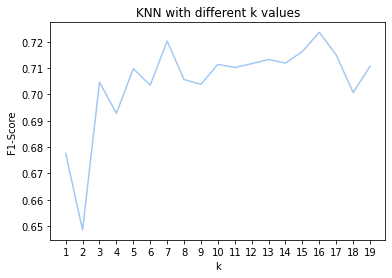

In [47]:
#Hyperparameter Tuning KNN
ks = []
performance = []
#Loop through
for k in range(1, 20):
    y_pred= train_and_predict_KNN(X_train, y_train, X_test, k)
    f1 = f1_score(y_test, y_pred)
    ks.append(k)
    performance.append(f1)
#Plot the results
plt.plot(ks, performance)
plt.xticks(range(1, 20, 1))
plt.xlabel('k')
plt.ylabel('F1-Score')
plt.title('KNN with different k values')

print(max(performance))

#This is a bit redundant but we will do it because the calculation needed is quite minimal. 
# Train and predict using the best k

best_k = ks[performance.index(max(performance))]
y_pred_knn_tuned = train_and_predict_KNN(X_train, y_train, X_test, best_k)

print(f"The best k is: {best_k}")


### 5.3. Logistic Regression

In [48]:
y_pred_lr_af = train_and_predict_LR(X_train, y_train, X_test)

c:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 5.3.1 Logistic Regression Hyperparameter Tuning

In [49]:
#Hyperparameter Tuning Logistic Regression
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    #'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear', 'lbfgs']  # Solvers compatible with penalties
}

# Initialize the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=43)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Safe model for software project use
best_lr = grid_search.best_estimator_

# Print the best parameters
print("The Best Parameters we could find are:", grid_search.best_params_)

# Predict using the best model
y_pred_lr_tuned = grid_search.best_estimator_.predict(X_test)



Fitting 5 folds for each of 60 candidates, totalling 300 fits
The Best Parameters we could find are: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
125 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\crist\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

### 5.4. Decision Trees

In [50]:
y_pred_dt_af = train_and_predict_DTC(X_train, y_train, X_test)

#### 5.4. Decision Trees Hyperparameter Tuning

In [51]:
#Decission Tree Hyperparameter Tuning
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeClassifier(random_state=43) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_DT_tuned = best_dtree_reg.predict(X_test)

best_params = grid_search.best_params_
print(f"The Best parameters we could find are: {best_params}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
The Best parameters we could find are: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


### 5.5. Naive Bayes

In [52]:
y_pred_nb_af = train_and_predict_GNB(X_train, y_train, X_test)

## 6. Evaluation & Interpretation

### 6.1 Evaluation Metric for the 5 Models

In [53]:
#function for the model scores
def get_model_scores(y_true, y_pred):
    scores = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
    }         
    return scores



In [54]:
# Save in variables the scores for each model
##svm
svm_scores = get_model_scores(y_test, y_pred_svm)
svm_af_scores = get_model_scores(y_test, y_pred_svm_af)
svm_tuned_scores = get_model_scores(y_test, y_pred_svm_tuned)
##knn
knn_scores = get_model_scores(y_test, y_pred_knn)
knn_af_scores = get_model_scores(y_test, y_pred_knn_af)
knn_tuned_scores = get_model_scores(y_test, y_pred_knn_tuned)
##lr    
lr_scores = get_model_scores(y_test, y_pred_lr)
lr_af_scores = get_model_scores(y_test, y_pred_lr_af)
lr_tuned_scores = get_model_scores(y_test, y_pred_lr_tuned)
##dt
dt_scores = get_model_scores(y_test, y_pred_dt)
dt_af_scores = get_model_scores(y_test, y_pred_dt_af)
dt_tuned_scores = get_model_scores(y_test, y_pred_DT_tuned)
##nb
nb_scores = get_model_scores(y_test, y_pred_gnb)
nb_af_scores = get_model_scores(y_test, y_pred_nb_af)



c:\Users\crist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# Create a DataFrame for performance comparison to see it on a table
metrics = list(svm_scores.keys())
results_perfomance_metric = pd.DataFrame({
    'SVM(before FE)': [svm_scores[m] for m in metrics],
    'SVM(after FE)': [svm_af_scores[m] for m in metrics],
    'SVM(tuned)': [svm_tuned_scores[m] for m in metrics],
    'KNN(before FE)': [knn_scores[m] for m in metrics],
    'KNN(after FE)': [knn_af_scores[m] for m in metrics],
    'KNN(tuned)': [knn_tuned_scores[m] for m in metrics],
    'LR(before FE)': [lr_scores[m] for m in metrics],
    'LR(after FE)': [lr_af_scores[m] for m in metrics],
    'LR(tuned)': [lr_tuned_scores[m] for m in metrics],
    'DT(before FE)': [dt_scores[m] for m in metrics],
    'DT(after FE)': [dt_af_scores[m] for m in metrics],
    'DT(tuned)': [dt_tuned_scores[m] for m in metrics],
    'NB(before FE)': [nb_scores[m] for m in metrics],
    'NB(after FE)': [nb_af_scores[m] for m in metrics],
}, index=metrics)

results_perfomance_metric

#Style the table
model_colors = {
    'SVM': '#ADD8E6',  # Light Blue
    'KNN': '#90EE90',  # Light Green
    'LR': '#FFD700',   # Gold
    'DT': '#FFA07A',   # Light Salmon
    'NB': '#DDA0DD'    # Plum
}

def get_model_from_column_name(col_name):
    return col_name.split('(')[0]

header_styles = []
for col_idx, col_name in enumerate(results_perfomance_metric.columns):
    model = get_model_from_column_name(col_name)
    color = model_colors.get(model, '#FFFFFF') 
    header_styles.append({
        'selector': f'th.col_heading.level0:nth-child({col_idx + 2})',
        'props': [('background-color', color), ('font-weight', 'bold'), ('color', 'black')]
    })

# perfmance metric in bold
header_styles.append({
    'selector': 'th.row_heading.level0', # Selector for row headers
    'props': [('font-weight', 'bold')]
})

styled = results_perfomance_metric.style.set_table_styles(header_styles, overwrite=False)

# Optionally, format the numbers to a consistent precision
#styled = styled.format(precision=3)

# Display the styled DataFrame
styled

,SVM(before FE),SVM(after FE),SVM(tuned),KNN(before FE),KNN(after FE),KNN(tuned),LR(before FE),LR(after FE),LR(tuned),DT(before FE),DT(after FE),DT(tuned),NB(before FE),NB(after FE)
Accuracy,0.649780,0.828194,0.909692,0.753304,0.811674,0.832599,0.834802,0.882159,0.914097,0.837004,0.857930,0.881057,0.834802,0.827093
Precision,0.000000,0.878505,0.918440,0.666667,0.781609,0.857759,0.841463,0.857627,0.919580,0.752976,0.788991,0.852349,0.787671,0.776632
Recall,0.000000,0.591195,0.814465,0.591195,0.641509,0.625786,0.650943,0.795597,0.827044,0.795597,0.811321,0.798742,0.723270,0.710692
F1 Score,0.000000,0.706767,0.863333,0.626667,0.704663,0.723636,0.734043,0.825449,0.870861,0.773700,0.800000,0.824675,0.754098,0.742200


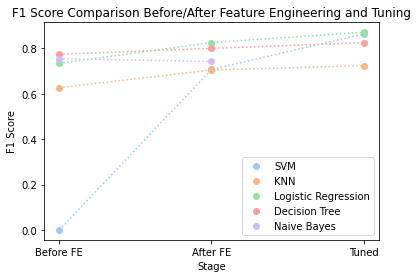

In [56]:
f1_scores = {
    'SVM': [
        f1_score(y_test, y_pred_svm),        # before FE
        f1_score(y_test, y_pred_svm_af),     # after FE
        f1_score(y_test, y_pred_svm_tuned)   # tuned
    ],
    'KNN': [
        f1_score(y_test, y_pred_knn),        # before FE
        f1_score(y_test, y_pred_knn_af),     # after FE
        f1_score(y_test, y_pred_knn_tuned)   # tuned
    ],
    'Logistic Regression': [
        f1_score(y_test, y_pred_lr),         # before FE
        f1_score(y_test, y_pred_lr_af),      # after FE
        f1_score(y_test, y_pred_lr_tuned)    # tuned
    ],
    'Decision Tree': [
        f1_score(y_test, y_pred_dt),         # before FE
        f1_score(y_test, y_pred_dt_af),      # after FE
        f1_score(y_test, y_pred_DT_tuned)    # tuned
    ],
    'Naive Bayes': [
        f1_score(y_test, y_pred_gnb),        # before FE
        f1_score(y_test, y_pred_nb_af),      # after FE
    ]
}


plt.scatter([0, 1, 2], f1_scores['SVM'], label='SVM')
plt.scatter([0, 1, 2], f1_scores['KNN'], label='KNN' )
plt.scatter([0, 1, 2], f1_scores['Logistic Regression'], label='Logistic Regression')
plt.scatter([0, 1, 2], f1_scores['Decision Tree'], label='Decision Tree')
plt.scatter([0, 1], f1_scores['Naive Bayes'], label='Naive Bayes')
plt.plot(f1_scores['SVM'], linestyle='dotted')
plt.plot(f1_scores['KNN'], linestyle='dotted')
plt.plot(f1_scores['Logistic Regression'], linestyle='dotted')
plt.plot(f1_scores['Decision Tree'],  linestyle='dotted')
plt.plot(f1_scores['Naive Bayes'], linestyle='dotted')
plt.xticks([0, 1, 2], ['Before FE', 'After FE', 'Tuned'])
plt.xlabel('Stage')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison Before/After Feature Engineering and Tuning')
plt.legend()
plt.show()


### 6.2 Confusion Matrix for LR and SVM

EXPLAIN WHY LR AND SVM BECAUSE THEY HAVE VERY SIMILAR SCORES FOR THE TUNED. CLASS 1 IS DROPOUT. LR looks like 1,1 more it predicted correctly

l

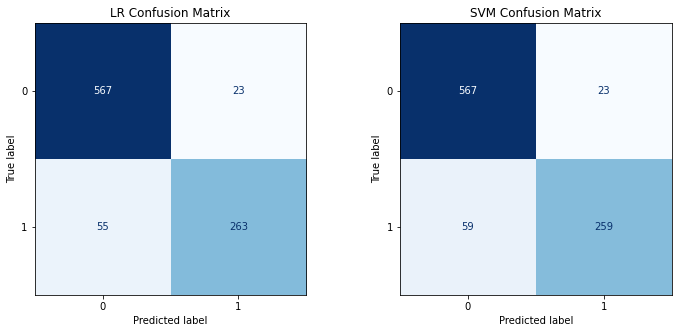

In [57]:
#CONSUFION MATRIX lR AND SVM
cm_LR = confusion_matrix(y_test,y_pred_lr_tuned)
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR)

cm_SVM = confusion_matrix(y_test,y_pred_svm_tuned)
disp_SVM = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
#disp_LR.plot()
#disp_SVM.plot()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#PLOT LR CONFUSION MATRIX
disp_LR.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('LR Confusion Matrix')

# PLOT SVM CONFUSION MATRIX
disp_SVM.plot(ax=axes[1], cmap='Blues', colorbar=False) # colorbar=False to save space
axes[1].set_title('SVM Confusion Matrix')

# Adjust layout to prevent titles/labels from overlapping
#plt.tight_layout()

# Display the plots
plt.show()

### 6.2 ROC AUC Curve for LR and SVM

In [58]:
#get probabilities
y_pred_proba_lr_tuned = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

y_pred_proba_svm_tuned = grid.best_estimator_.predict_proba(X_test)[:, 1]


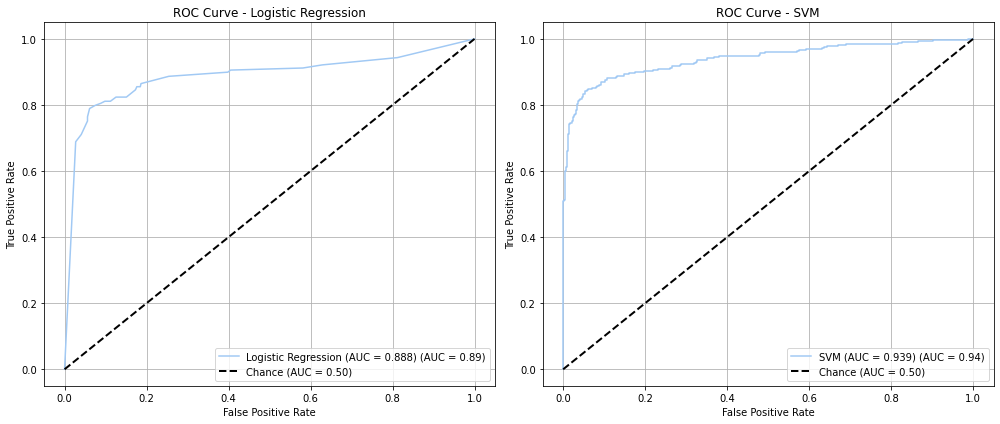


Logistic Regression AUC: 0.888
SVM AUC: 0.939


In [59]:
# --- Plotting ROC Curves ---
# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjust figsize as needed

# --- Plot ROC Curve for Logistic Regression ---
# Calculate ROC curve points and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr_tuned)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve on the first subplot (axes[0])
RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr,
                estimator_name=f'Logistic Regression (AUC = {roc_auc_lr:.3f})').plot(ax=axes[0])

axes[0].plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)') # Plot the diagonal line for reference
axes[0].set_title('ROC Curve - Logistic Regression')
axes[0].legend(loc='lower right')
axes[0].grid(True)


# --- Plot ROC Curve for SVM ---
# Calculate ROC curve points and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm_tuned)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve on the second subplot (axes[1])
RocCurveDisplay(fpr=fpr_svm, tpr=tpr_svm, roc_auc=roc_auc_svm,
                estimator_name=f'SVM (AUC = {roc_auc_svm:.3f})').plot(ax=axes[1])

axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)') # Plot the diagonal line for reference
axes[1].set_title('ROC Curve - SVM')
axes[1].legend(loc='lower right')
axes[1].grid(True)


# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()

# Print AUC scores for easy comparison
print(f"\nLogistic Regression AUC: {roc_auc_lr:.3f}")
print(f"SVM AUC: {roc_auc_svm:.3f}")


1. CAN CREATE PRECISION RECALL PLOT 
2. f two models perform almost identically, the simpler model is often preferred. A simpler model is usually easier to understand, debug, and maintain in the long run. Logistic Regression is generally simpler than an RBF SVM.
3.For real-time prediction systems, the speed of prediction is crucial. SVMs with probability=True can be slower during prediction than standard SVMs or Logistic Regression because of the extra calibration step.Logistic Regression (LogisticRegression):

Logistic Regression is inherently a probabilistic model. Its core function is to model the probability of a binary outcome.SVMs (specifically SVC for classification) are primarily discriminative models. Their main goal is to find the optimal hyperplane that separates classes, focusing on the decision boundary rather than directly modeling probabilities.
While they can classify new data points, obtaining well-calibrated probabilities from an SVM is not inherent to its algorithm.

#why svm improves a lot more after FE

## 7. Conclusion